In [1]:
from matplotlib.axes._axes import _log as matplotlib_axes_logger
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
# import earthpy as et
from pandas.plotting import register_matplotlib_converters

In [2]:
register_matplotlib_converters()

In [3]:
matplotlib_axes_logger.setLevel('ERROR')
import warnings
warnings.filterwarnings('ignore')

In [4]:
sns.set(font_scale=1.5, style="whitegrid")

In [5]:
# data = et.data.get_data('colorado-flood')

In [6]:
data = pd.read_csv('precipitation/805325-precip-daily-2003-2013.csv', na_values=['999.99'], parse_dates=['DATE'], index_col=['DATE'])

In [7]:
data.head()

,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,HPCP,Measurement Flag,Quality Flag
DATE,,,,,,,,
2003-01-01 01:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.0,g,
2003-02-01 01:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.0,g,
2003-02-02 19:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.2,,
2003-02-02 22:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.1,,
2003-02-03 02:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.1,,


<AxesSubplot:title={'center':'Daily Precipitation'}, xlabel='DATE'>

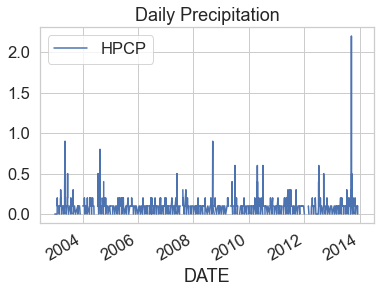

In [8]:
data.plot(y='HPCP', title='Daily Precipitation')

In [9]:
data['HPCP'].describe()

count    1746.000000
mean        0.111856
std         0.093222
min         0.000000
25%         0.100000
50%         0.100000
75%         0.100000
max         2.200000
Name: HPCP, dtype: float64

In [10]:
data.dtypes

STATION              object
STATION_NAME         object
ELEVATION           float64
LATITUDE            float64
LONGITUDE           float64
HPCP                float64
Measurement Flag     object
Quality Flag         object
dtype: object

In [19]:
precip_2005 = data['2005']
precip_2005.head()

,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,HPCP,Measurement Flag,Quality Flag
DATE,,,,,,,,
2005-01-01 01:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.0,g,
2005-01-02 06:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,NaN,{,
2005-01-02 08:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,NaN,},
2005-01-05 08:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.1,,
2005-01-12 04:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.1,,


<AxesSubplot:xlabel='DATE', ylabel='HPCP'>

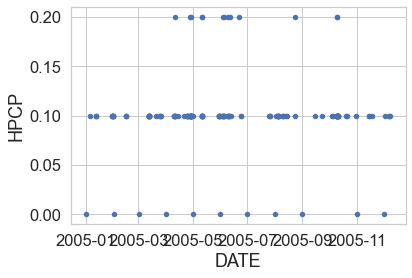

In [20]:
precip_2005 = precip_2005.dropna()
precip_2005.reset_index().plot(x = 'DATE', y='HPCP', kind='scatter')

Data Summarized Daily instead of hourly.

In [23]:
precip_2005_daily = precip_2005.resample('D').sum()

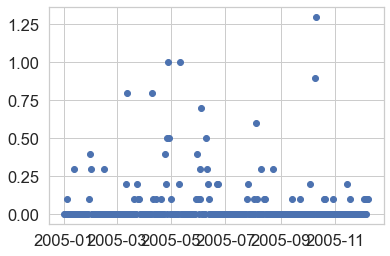

In [28]:
f, ax = plt.subplots()
ax.scatter(x=precip_2005_daily.index.values, y=precip_2005_daily['HPCP'])